# Analysis COVID-19 in NSW

What observations and conclusions can be derived by analysing COVID-19 data in NSW?

COVID-19 Data provided by [Data.NSW](https://data.nsw.gov.au/nsw-covid-19-data).

- Cases Datasets: [Cases](https://data.nsw.gov.au/nsw-covid-19-data/cases)
- Tests Datasets: [Tests](https://data.nsw.gov.au/nsw-covid-19-data/tests)

By John Chen | z5163210 | https://github.com/JCyalater



In [1070]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import geopandas as gpd
import shapely
import fiona

In [1071]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [1072]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

# Exploring COVID-19 Cases by Notification Date and Age Range

In [1073]:
fp1="COVID/New data/CASES-by-notification-date-and-age-range.csv"
cases_DateAge = pd.read_csv(fp1)
cases_DateAge.head().append(cases_DateAge.tail(5))


,notification_date,age_group
0,9/03/2020,AgeGroup_10-14
1,9/03/2020,AgeGroup_20-24
2,9/03/2020,AgeGroup_25-29
3,9/03/2020,AgeGroup_35-39
4,9/03/2020,AgeGroup_35-39
2936,24/04/2020,AgeGroup_70+
2937,24/04/2020,AgeGroup_70+
2938,24/04/2020,AgeGroup_70+
2939,24/04/2020,AgeGroup_70+
2940,24/04/2020,AgeGroup_70+


In [1074]:
cases_DateAge.columns

Index(['notification_date', 'age_group'], dtype='object')

In [1075]:
# Colour Bank
colours = ['#85294E', '#213364','#511053','#8A3255','#8F3A5C','#784579','#944363','#994C6A','#9D5472','#A25D79','#8B608C','#A76680'
                         ,'#AC6E87','#B1778E','#B68095','#BB889C','#6B7798','#C091A4','#C59AAB','#9E7A9F','#CAA2B2','#C5AFC6','#CFABB9', '#D4B4C1']  
rb = ["#221a7c", "#2548a4", "#0089c0", "#00bac7", "#6cd6bc", "#94d4bc", "#c7f4b2", "#f0ffc0"]
bG = ["#4cca2b", "#2bca6b", "#2bca8b", "#2bcabb", "#2bc1ca", "#2C9BBE","#197FBF", "#0353C4", "#013ABE", "#0428BA", "#0404B4", "#001B87","#0A14A5", "#08088A", "#010C38"]
blueWhite = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"]

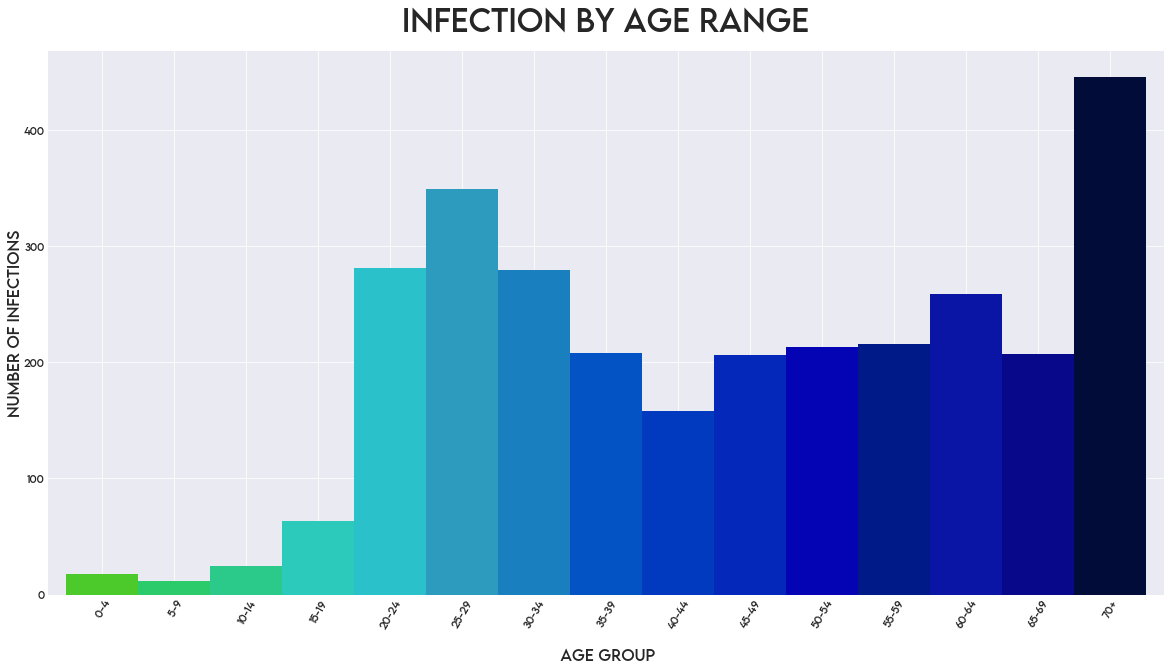

In [1076]:
bg = ["#4cca2b", "#2bca6b", "#2bca8b", "#2bcabb", "#2bc1ca", "#2C9BBE","#197FBF", "#0353C4", "#013ABE", "#0428BA","#0B2CAF", "#001B87", "#000369", "#010C38", "#000010"]
#removes first 9 characters "AgeGroup_" of age_group column so that only the age range numbers remain
cases_DateAge["age_group"] = cases_DateAge["age_group"].str[9:]

count1 = cases_DateAge["age_group"].value_counts().sort_index()
count1.plot(kind="bar", color = bG , width=1)

plt.xticks(fontsize=10, rotation='60')
plt.title("Infection by Age Range", family="Lemon Milk",pad=20,fontsize=30)
plt.xlabel('\n Age Group', family="Lemon Milk",fontsize=15)
plt.ylabel('Number of Infections', rotation='vertical', family="Lemon Milk",fontsize=15)

(plt.show())
    

This graph ranks the age ranges that have a statistically higher number of cases, in ascending order. 
Observations: 
- The elderly are most at risk of infection
- Adults in their 20s and early 20s also have a high rate of cases
- Children have the lowest rates of infection

Assumptions:
- Elderly have weaker immune systems so risk of cases is high. 
- However, unlike children, they are not as sheltered to the outside world. Hence, there may be higher rates of transmission.
- Adults are frequently exposed to the public i.e. public transport, work, bars, and restaurants. This exposure to the public may lead to more cases. 

In [1077]:
cases_DateAge["notification_date"] = pd.to_datetime(cases_DateAge["notification_date"], format = '%d/%m/%Y').dt.date # order by date month year
cases_DateAge["notification_date"].head()


0    2020-03-09
1    2020-03-09
2    2020-03-09
3    2020-03-09
4    2020-03-09
Name: notification_date, dtype: object

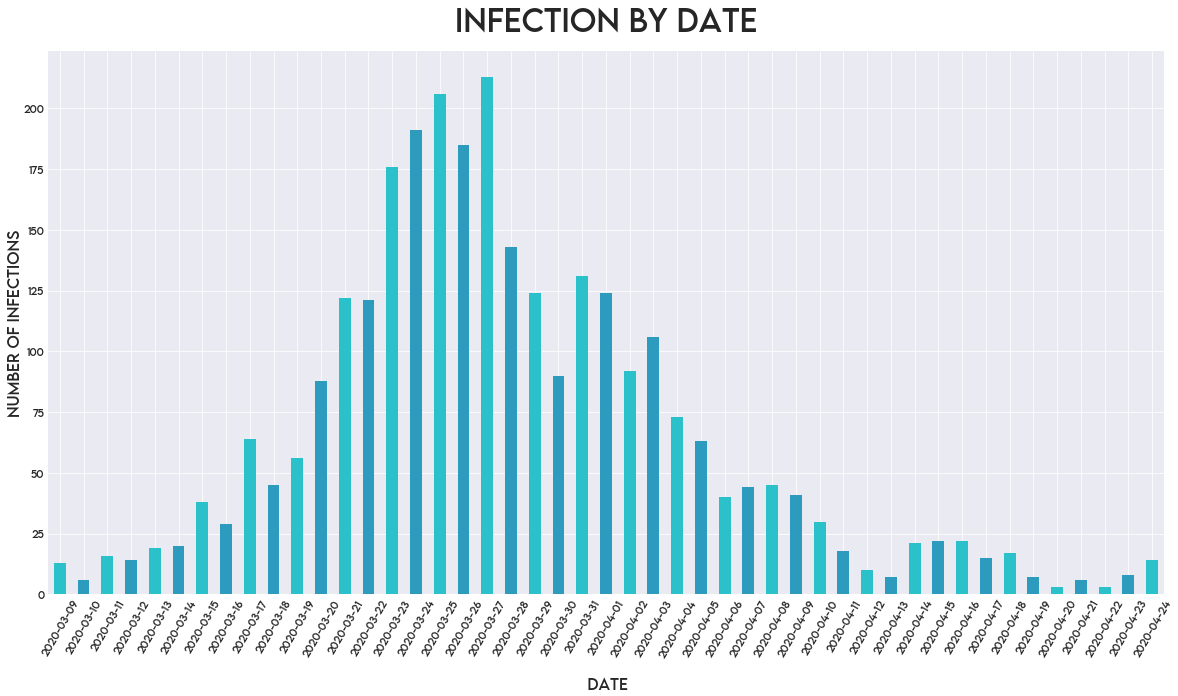

In [1078]:

count2 = cases_DateAge["notification_date"].value_counts().sort_index() # sort into date order
count2.plot(kind="bar", color = ["#2bc1ca", "#2C9BBE"], width=0.5)

plt.xticks(fontsize=10, rotation='60')
plt.title("Infection by Date", family="Lemon Milk",pad=20,fontsize=30)
plt.xlabel('\n Date', family="Lemon Milk",fontsize=15)
plt.ylabel('Number of Infections', rotation='vertical', family="Lemon Milk",fontsize=15)
plt.style.use("seaborn-darkgrid")

From this graph, the infection trend can be seen to peak at the end of March, in a . 

Note: 
>This is data only shows the data from a 1 month period between March 27th till April 22nd, during the peak infection period in NSW. Further data prior/after this period has been restricted by the government due to privacy concerns as the risk of gaining information about an individual in the dataset increases as the number of cases decreases. 

In [1079]:
fp2="COVID/New data/TESTS-by-date-and-age-range.csv"
tests_DateAge = pd.read_csv(fp2)
tests_DateAge.head()

,test_date,age_group
0,9/03/2020,AgeGroup_ 0-9
1,9/03/2020,AgeGroup_ 0-9
2,9/03/2020,AgeGroup_ 0-9
3,9/03/2020,AgeGroup_ 0-9
4,9/03/2020,AgeGroup_ 0-9


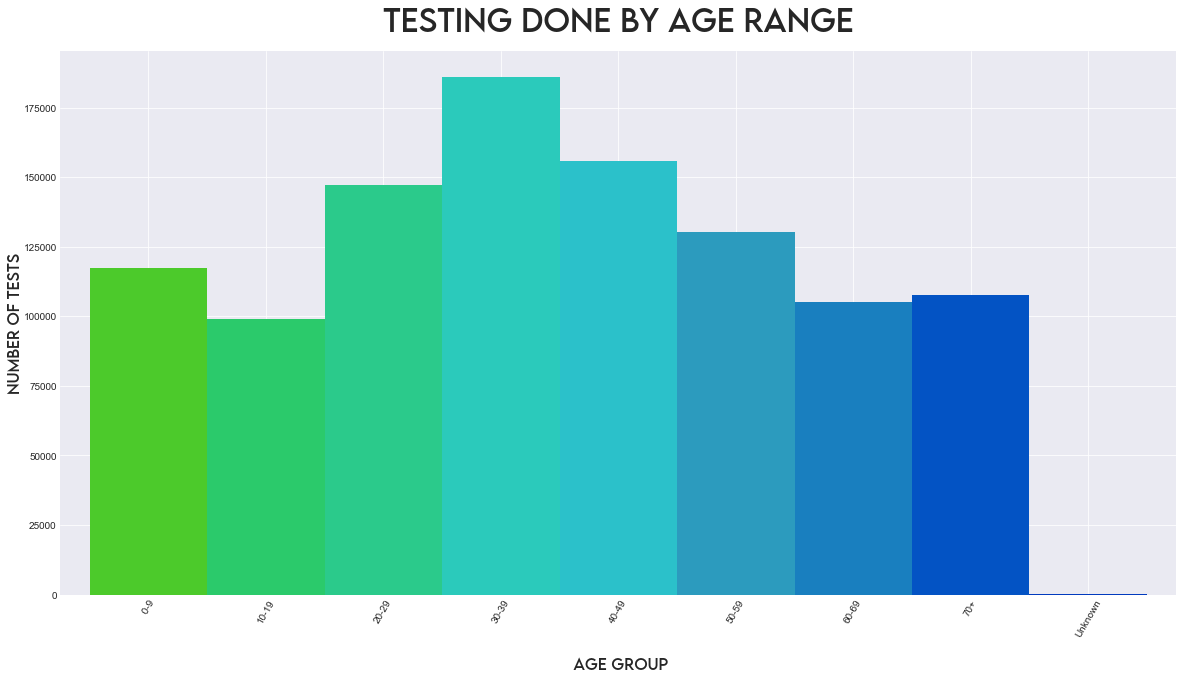

In [1080]:
bg = ["#4cca2b", "#2bca6b", "#2bca8b", "#2bcabb", "#2bc1ca", "#2C9BBE","#197FBF", "#0353C4", "#013ABE", "#0428BA","#0B2CAF", "#001B87", "#000369", "#010C38", "#000010"]
#removes first 9 characters "AgeGroup_" of age_group column so that only the age range numbers remain
tests_DateAge["age_group"] = tests_DateAge["age_group"].str[9:]

count1 = tests_DateAge["age_group"].value_counts().sort_index()
count1.plot(kind="bar", color = bG , width=1)

count1.plot(kind="bar", color = bg, width=1)
plt.xticks(fontsize=10, rotation='60')
plt.title("Testing Done by Age Range", family="Lemon Milk",pad=20,fontsize=30)
plt.xlabel('\n Age Group', family="Lemon Milk",fontsize=15)
plt.ylabel('Number of Tests', rotation='vertical', family="Lemon Milk",fontsize=15)

(plt.show())

- The highest number of tests are done by people aged from 30-39
- Symmetrical nature of chart indicates the degree of self-accountability
> - Children and elderly people are at risk of health complications if infect, hence they are more vigilant than the 10-19 and 60-69 age ranges
> - Middle aged and working adults who are exposed to the public more often are seen to test more often. Factors for increased testing rates include:
>> - Work related testing requirements
>> - Accountability to family - especially children and elderly


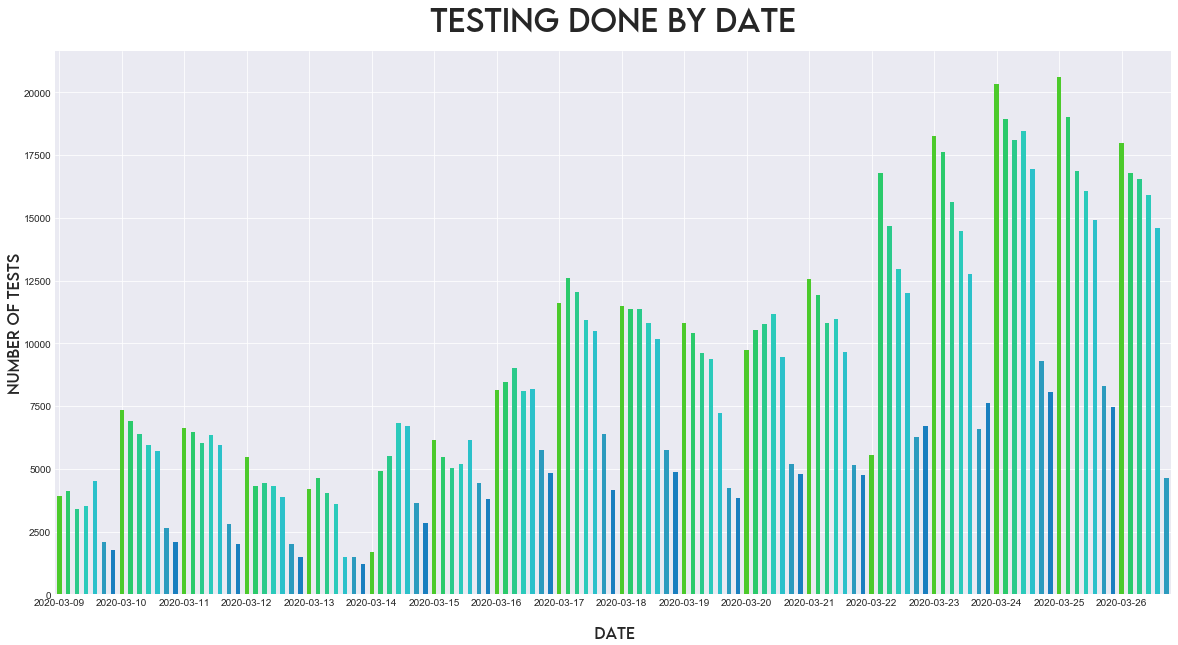

In [1081]:
tests_DateAge["test_date"] = pd.to_datetime(tests_DateAge["test_date"], format = '%d/%m/%Y').dt.date # order by date month year

count2 = tests_DateAge["test_date"].value_counts().sort_index() # sort into date order
count2= count2.plot(kind="bar", color = bG[0:7], width=0.5)
xtix = count2.get_xticks()
count2.set_xticks(xtix[::int(7)])


plt.xticks(fontsize=10, rotation='0',)
plt.title("Testing Done by Date", family="Lemon Milk",pad=20,fontsize=30)
plt.xlabel('\n Date', family="Lemon Milk",fontsize=15)
plt.ylabel('Number of Tests', rotation='vertical', family="Lemon Milk",fontsize=15)
plt.grid(True)

From the graph above, the daily COVID testing numbers can be analysed. The dates are colour coded into the 7 days of the week.
- The two darker blue colours indicate Saturday and Sunday
> - We notice that the rates of testing on the weekends always drops by more than 50%
> - Rates of testing is observed to spike directly after the weekends, on Mondays and Tuesdays.
> - Testing slowly tapers down as Friday approaches. 
 

# Locational and Source Analysis

In [1082]:

fp3="COVID/New data/CASES-by-notification-date-location-and-likely-source-of-infection.csv"
cases_LocationSource = pd.read_csv(fp3, encoding = 'unicode_escape')

cases_LocationSource['locality'] = cases_LocationSource.locality.str.upper() 
cases_LocationSource.head()

,notification_date,postcode,likely_source_of_infection,lhd_2010_code,lhd_2010_name,lga_code19,Suburb,locality,Unnamed: 8
0,25/01/2020,2134.0,Overseas,X700,Sydney,11300.0,Burwood (A),BURWOOD,NaN
1,25/01/2020,2121.0,Overseas,X760,Northern Sydney,16260.0,Parramatta (C),PARRAMATTA,NaN
2,25/01/2020,2071.0,Overseas,X760,Northern Sydney,14500.0,Ku-ring-gai (A),KU-RING-GAI,NaN
3,27/01/2020,2033.0,Overseas,X720,South Eastern Sydney,16550.0,Randwick (C),RANDWICK,NaN
4,01/03/2020,2163.0,Overseas,X710,South Western Sydney,12850.0,Fairfield (C),FAIRFIELD,NaN


In [1083]:
fp5="COVID/New data/TESTS-by-date-and-postcode-local-health-district-and-local-government-area.csv"
tests_LocationSource = pd.read_csv(fp5, encoding = 'unicode_escape')
tests_LocationSource.head()

,test_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
0,01/01/2020,2038.0,X700,Sydney,14170.0,Inner West (A)
1,01/01/2020,2039.0,X700,Sydney,14170.0,Inner West (A)
2,01/01/2020,2040.0,X700,Sydney,14170.0,Inner West (A)
3,01/01/2020,2041.0,X700,Sydney,14170.0,Inner West (A)
4,01/01/2020,2069.0,X760,Northern Sydney,14500.0,Ku-ring-gai (A)


In [1084]:
def cases_sauce():
    cases_sauce = cases_LocationSource['likely_source_of_infection'].value_counts()
    palette = sns.cubehelix_palette(reverse=True, as_cmap=True)
    cases_sauce.plot(kind='pie', figsize=(15,15), cmap = palette, labeldistance=1.2, pctdistance=1.1, wedgeprops   = { 'linewidth' : 2,'edgecolor' : "white" },label='', autopct='%1.0f%%')
    plt.title("Sources of Cases", family="Lemon Milk",fontsize=15,);
    return (plt.show())

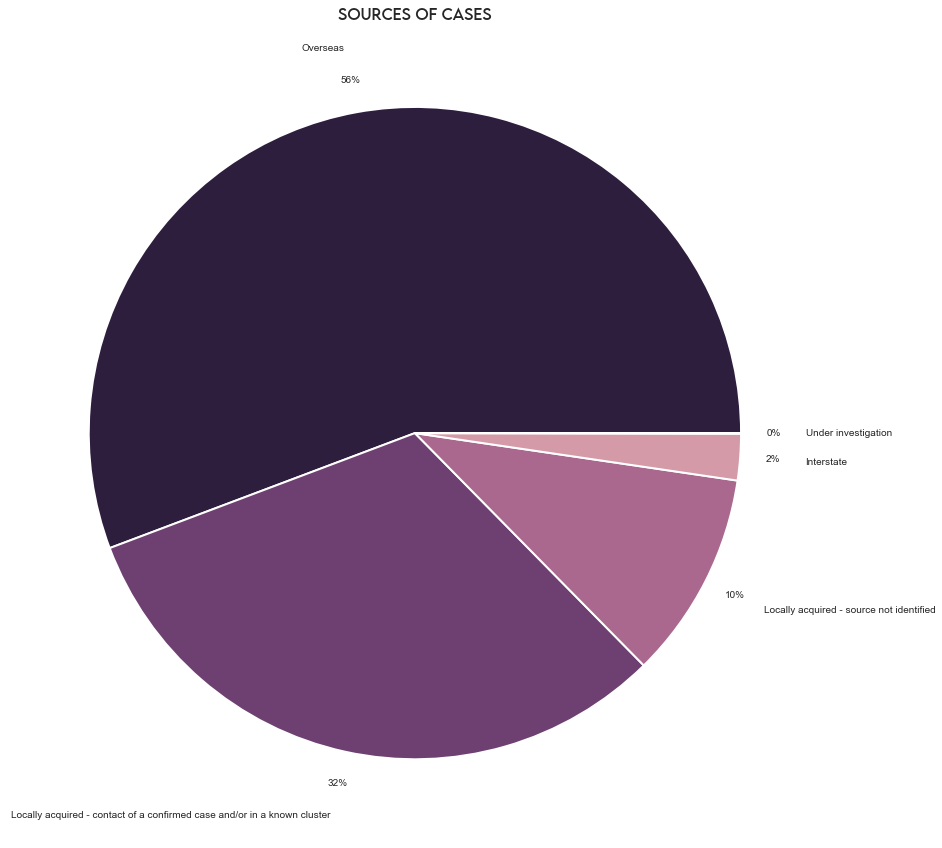

In [1085]:
cases_sauce()

- In NSW, the largest current source of cases is infection from overseas sources.

- From locally acquired infections, 76.12% of the cases can be traced to a known source, while 23.81% of cases have no source identified.

- The 2% of interstate Cases are known to have been acquired from Victoria, and have been attributed as the source to some locally acquired cases.

In [1086]:
def cases_areas():
    cases_area = cases_LocationSource['lhd_2010_name'].value_counts()
    palette = sns.cubehelix_palette(reverse=True, as_cmap=True)
    cases_area.plot(kind='pie', figsize=(15,15), cmap = palette, labeldistance=1.2, pctdistance=1.1, wedgeprops   = { 'linewidth' : 2,'edgecolor' : "white" },label='', autopct='%1.0f%%')
    plt.title("Regional Location of Cases", family="Lemon Milk",fontsize=15,);
    return (plt.show())

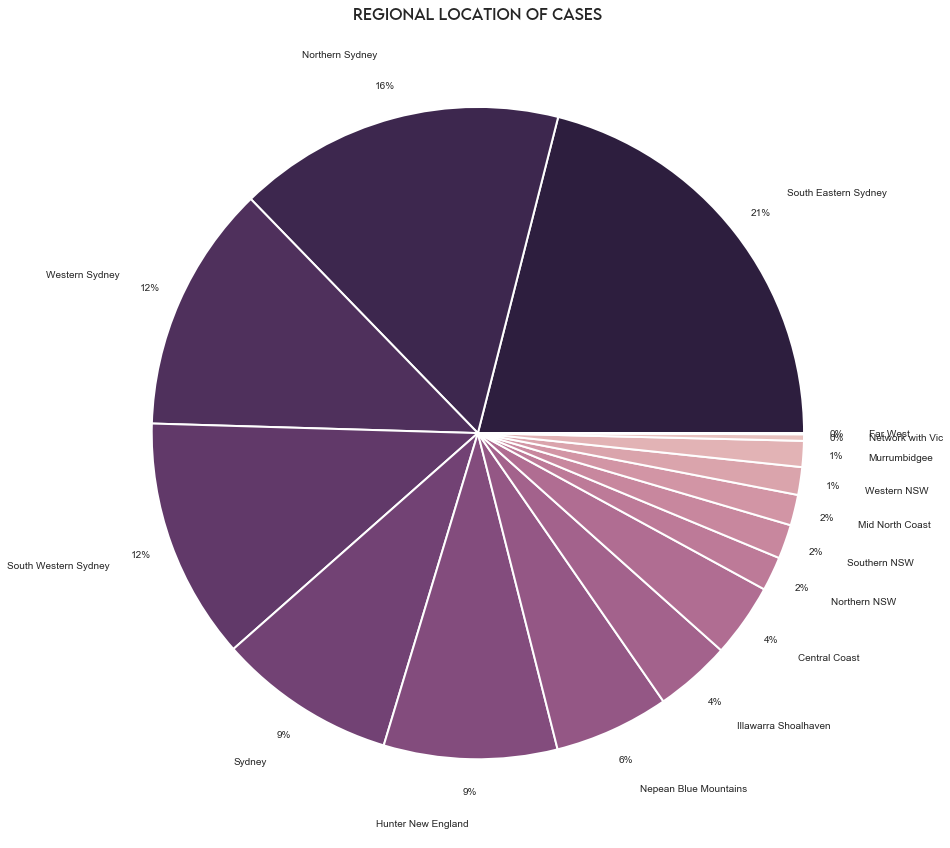

In [1087]:
cases_areas()

From, this regional graph, it is interesting to see that hotspots are located the Sydney Metropolitan, namely the Sydney, South Western, Western, Northen, and South Eastern Sydney regions, constituting for about 70% of the total cases in NSW.
- It would be wise to move to regional NSW if you are paranoid of infection.
- OR Stay home

# Comparing Plot Data of Cases and Testing Done Over Time

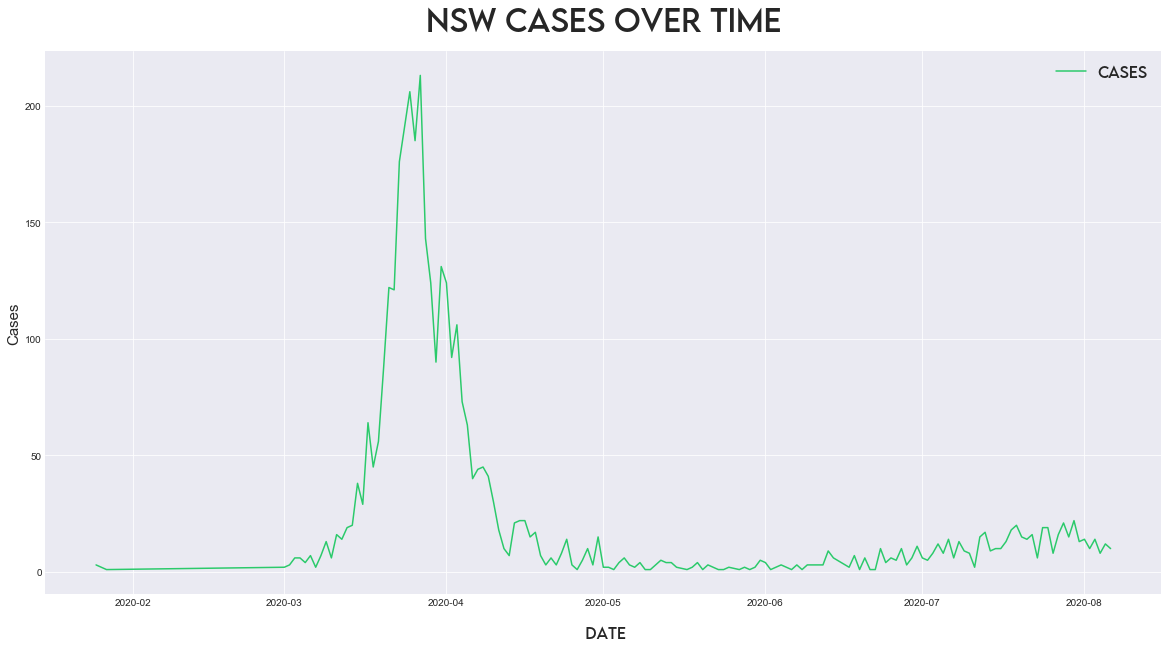

In [1088]:
#Cases vs Date
cases_LocationSource["notification_date"]=pd.to_datetime(cases_LocationSource["notification_date"], format = '%d/%m/%Y').dt.date
#tests_DateAge["test_date"] = pd.to_datetime(tests_DateAge["test_date"], format = '%d/%m/%Y').dt.date # order by date month year

count3 = cases_LocationSource["notification_date"].value_counts().sort_index() # sort into date order
count3= count3.plot(kind="line", color = bG[1], label='Cases')

plt.rcParams["font.family"] = "Lemon Milk"

plt.xticks(fontsize=10, rotation='0',)
plt.title("NSW Cases over Time", family="Lemon Milk", pad=20,fontsize=30)
plt.xlabel('\n Date', family="Lemon Milk",fontsize=15)
plt.ylabel('Cases', rotation='vertical',fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)


- The rate of cases can be seen here with the initial spike reaching a peak during the end of March.
- There has been an increase of cases from mid July-Present due to the increase of cases in Victoria.

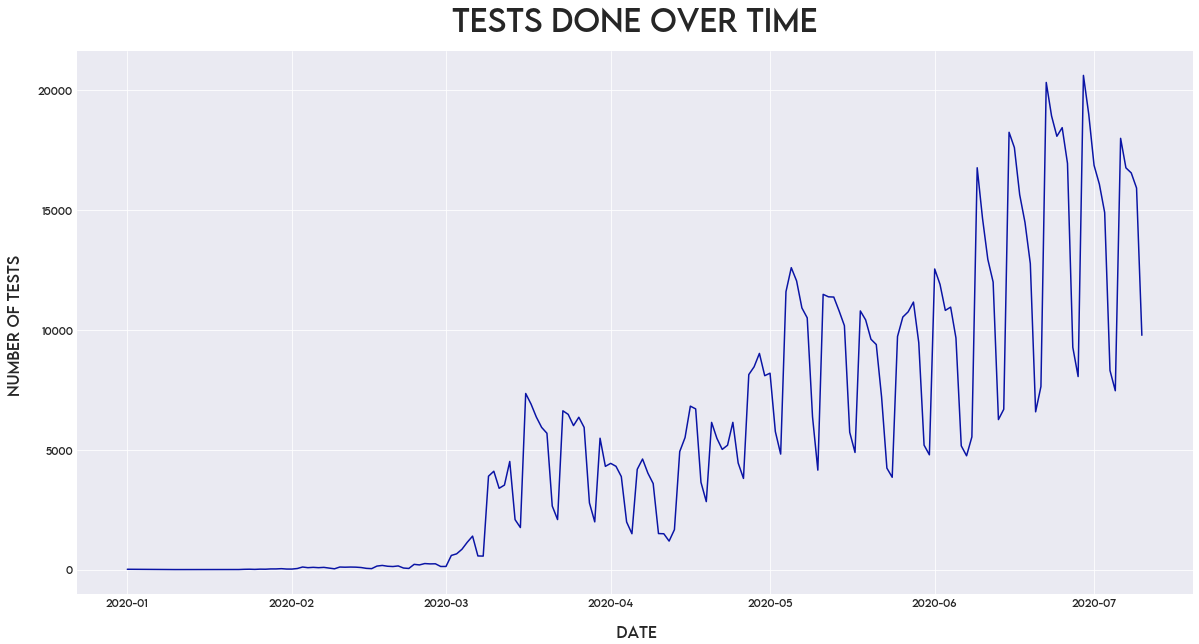

In [1089]:
tests_LocationSource["test_date"]=pd.to_datetime(tests_LocationSource["test_date"], format = '%d/%m/%Y').dt.date # order by date month year

count4 = tests_LocationSource["test_date"].value_counts().sort_index() # sort into date order
count4= count4.plot(kind="line", color = bG[-3],label='Tests')


plt.xticks(fontsize=10, rotation='0',)
plt.title("Tests Done Over Time", family="Lemon Milk",pad=20,fontsize=30)
plt.xlabel('\n Date', family="Lemon Milk",fontsize=15)
plt.ylabel('Number of Tests \n', rotation='vertical', family="Lemon Milk",fontsize=15)
plt.grid(True)

- As indicated before, the rate of testing is seen to drop on weekends, hence the spikes.
- From March and onwards, there has been an exponential increase in testing done.
- Notable testing spikes occurred on:
> - March: Covid Spike in NSW
> - May: Reduction of Cases in NSW, people return back to work and testing is required by many employers
> - Mid June: Rapid increase of cases in Victoria

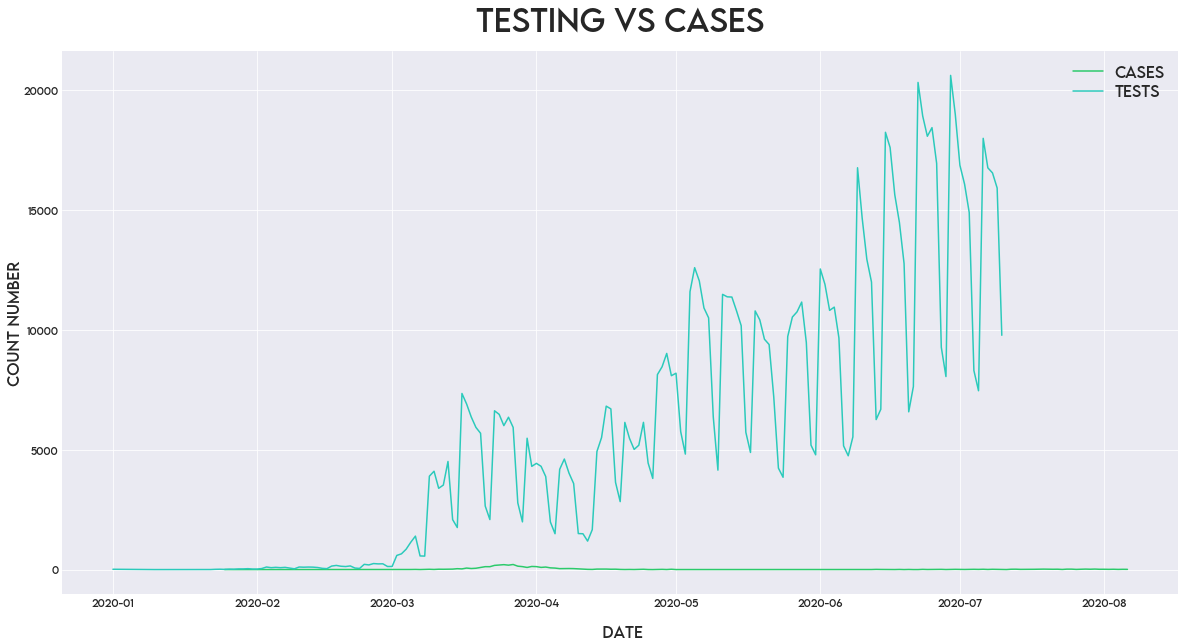

In [1090]:

count3 = cases_LocationSource["notification_date"].value_counts().sort_index() # sort into date order
count3.columns = ["notification_date","counts"]
count3 = count3.plot( kind="line", color = bG[1], label ='cases')


count4 = tests_LocationSource["test_date"].value_counts().sort_index() # sort into date order
count4= count4.plot(kind="line", color = bG[3], label='Tests')


plt.xticks(fontsize=10, rotation='0',)
plt.title("Testing vs Cases", family="Lemon Milk",pad=20,fontsize=30)
plt.xlabel('\n Date', family="Lemon Milk",fontsize=15)
plt.ylabel('Count Number', rotation='vertical', family="Lemon Milk",fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)



Observations:
- Inital spike in cases was detected after inital spike in tests
- Cases are seen to have decreased in NSW over time and with small increases lately.
- Testing has dramatically increased.
- With more testing, there was a decrease in cases.

Assumptions:
- People have been more proactive with testing.
- Cases decrease as once people have become aware of their infection, measures of quarantining and isolation are being used

# Conclusions

- If you don't want to be infected, don't be in your 20s or 70+ y.o.
- Less cases in 30s and 40s due to more testing
- Be cautious when in metropolitan Sydney as most cases have been recorded there.
- Increases in testing have correlated to less cases due to higher rates of detection. 

People are adaptable, even in the midst of a crisis. In order to reduce rate of infection and cases, proactivity in preventive measures such as testing, social-distanceing, quarantining have help the spread of COVID-19 in NSW.
